In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
m=0
c=0
#learning rate
L=0.0001
epoch=3
epoch_count_list=[]
epoch_error_list=[]

In [29]:
data=pd.read_csv('data.csv', header=0)

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [28]:
X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

In [44]:
def mse(N, Y,Y_hat):
    return (1/N)*sum(Y-Y_hat)**2

In [45]:
def gradient_descent_fit(m, c, N, L):
    for i in range(epoch):
        Y_hat=m*X+c
        
        epoch_count_list.append(i)
        
        epoch_error=mse(N, Y,Y_hat)
        
        epoch_error_list.append(epoch_error)
        
        #derrivate with respect to m
        D_m=(-2/N)*sum(X*(Y-Y_hat))
        
        #derrivate with respect to c
        D_c=(-2/N)*sum(Y-Y_hat)
        
        m=m-(L*D_m)
        
        c=c-(L*D_c)    
    print('Final M is ', m,' Final c is ' ,c)
    return Y_hat


Final M is  1.2922546649153903  Final c is  0.02557922432134816


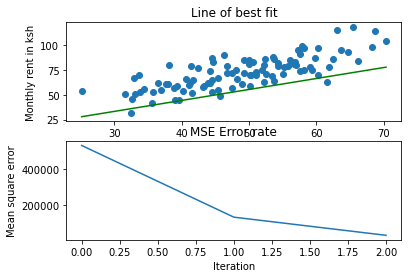

In [46]:
fig,(ax1, ax2)=plt.subplots(2)

ax1.set(xlabel='Office size in sq_ft')
ax1.set(ylabel='Monthly rent in ksh')
ax1.scatter(X, Y)
ax1.set_title('Line of best fit')

ax2.set_title('MSE Error rate')
ax2.set(xlabel='Iteration')
ax2.set(ylabel='Mean square error')

epoch_count_list=[]
epoch_error_list=[]

Y_hat=gradient_descent_fit(m, c, N, L)

ax1.plot([min(X),max(X)],[min(Y_hat),max(Y_hat)],color='green')
ax2.plot(epoch_count_list,epoch_error_list)
